# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


A "dumb" classifier that only predicts the mean would predict $454,342.94 for all houses.

### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **

1) Since "RM" is the average number of rooms among homes in the neighborhood, the larger it is, the more space, and hence the more expensive. So  the increase in the value of 'RM' leads to an increase in the value of 'MEDV'.

2) The increase in the value of "LSTAT" leads to decrease of "MEDV" when the values of the other features are fixed.  That is because "LSTAT" is the precentage of homeowners in the neighborhood considered "lower class" (working poor). The higher the percentage is, the more people with lower income. Usually, the prices of houses are related to people's income. 

3) As "PTRATIO" increases, "MEDV" is expected to decrease when other variables are constants. That is because high ratio of students to teachers may decrease the education quality.  People would like to live in a neighborhood where good education can be provided for their children. The fact makes the price of a house higher if it has high value of "PTRATIO" when other predictors are constant.


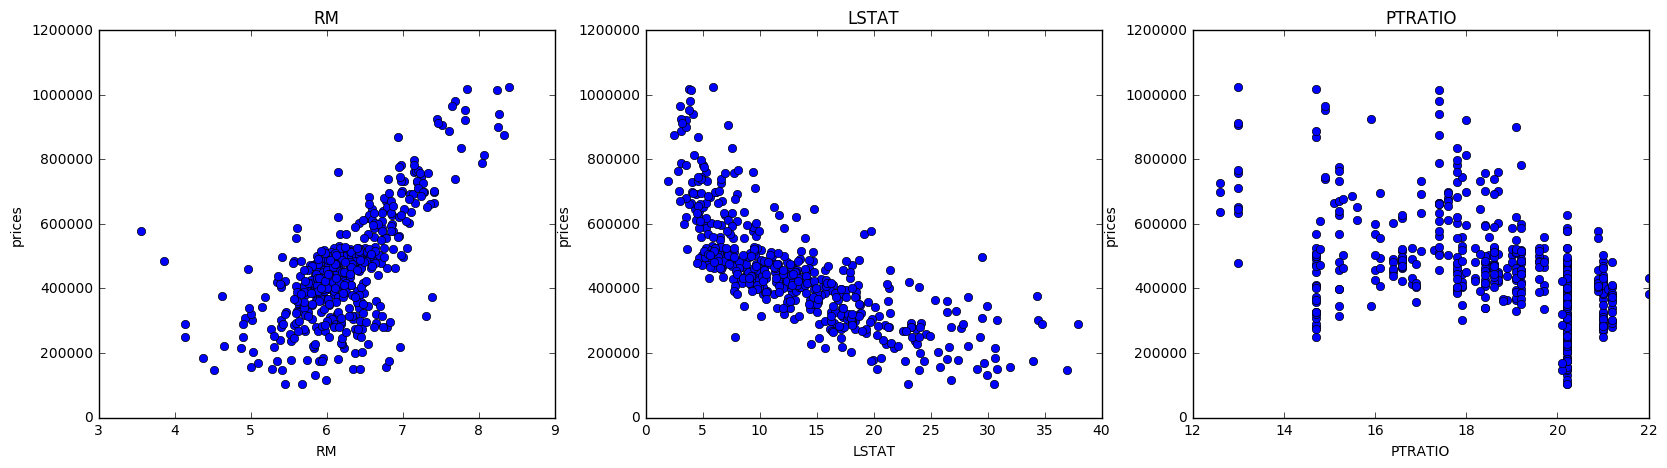

In [7]:
# And we can use plot to show this.
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    plt.plot(data[col], prices, 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [8]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [70]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


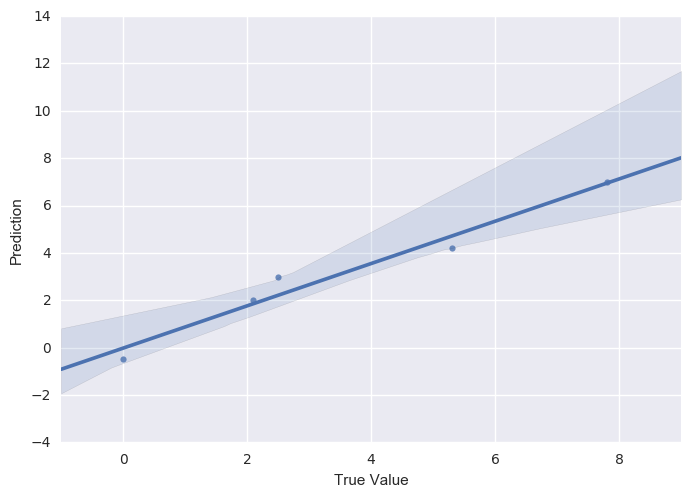

In [13]:
import seaborn as sns
sample_data=pd.DataFrame([3.0,-0.5,2.0,7.0,4.2],[2.5,0.0,2.1,7.8,5.3]).reset_index()
sample_data.columns=['True Value','Prediction']
sns.regplot('True Value','Prediction', sample_data)

**Answer:** The model successfully captured the variation of the target variable. The predictions are not far away from the true values. Also, R^2 is 92.3%, it is very close to 1. This implies 92.3% of variation is explained by the target variable and it seems to be high.

Here we only have five points, we could be more confident with more points. 

Some remarks on R -squared:

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:

R-squared = Explained variation / Total variation
R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.
In general, the higher the R-squared, the better the model fits your data. So with a high value of 92.3% (0.923) we can clearly see that we have strong correlation between the true values and predictions.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [15]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices,test_size=0.2,random_state=2017)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: ** It can let us test the model trained by the training data using a new dataset: testing dataset. If we use train data to test the model, we can not tell whether it suffers from high bias or high variance. 


1. As we definitely need to protect against overfitting

2. As we can get a good estimate of our generalization accuracy on this testing dataset

3. As our main goal is to accurately predict on new unseen data


The purpose and benefit of having training and testing subsets from a dataset is the opportunity to quantify the model performance on an independent dataset and to check for overfitting. Evaluating and measuring the performance of the model over the testing subset provides estimations of the metrics that reflect how good the model predictions will be when the model is used to estimate the output using independent data (that was not used by a learning algorithm when the model was being tuned). If there is no testing subset available, there would be no way to estimate the performance of the model.



More resourses:
https://classroom.udacity.com/courses/ud730/lessons/6370362152/concepts/63798118300923
https://classroom.udacity.com/courses/ud730/lessons/6370362152/concepts/63798118310923

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

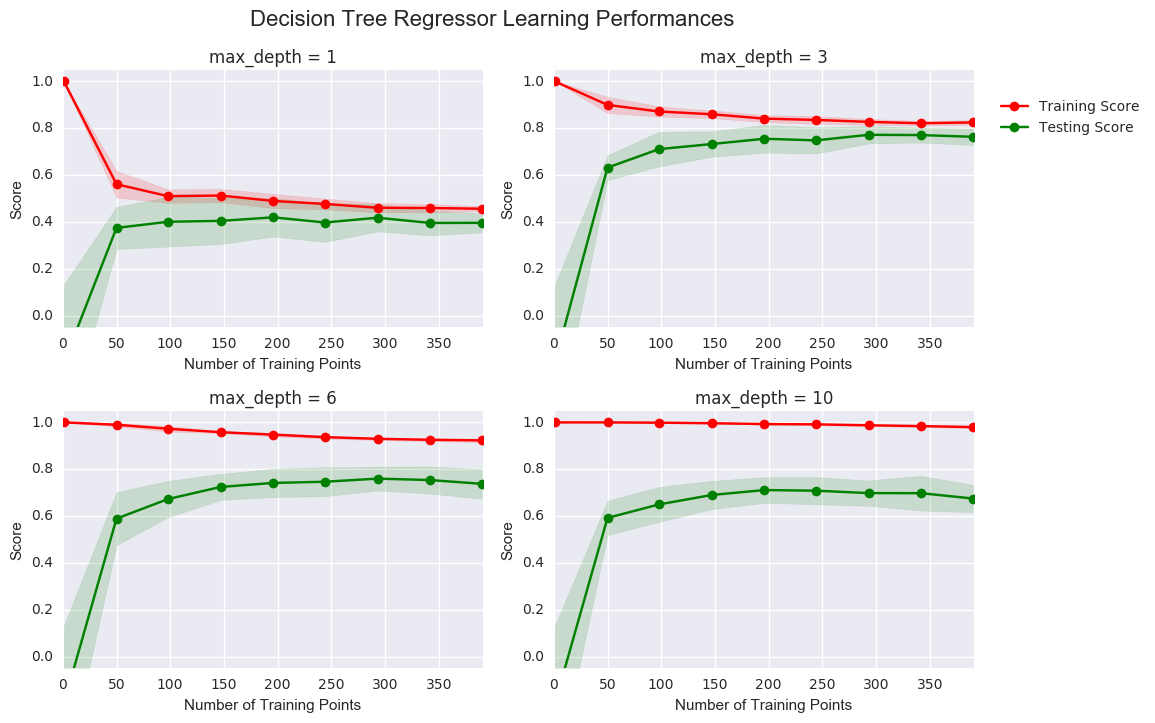

In [16]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: ** For the model with maximum depth 6, the score of the training curve decreases in a near linear fashion when the size of training dataset increases. But it is very close to 1. While the score of the test curve increases,but as the size becomes bigger, the increment is not so much. The gap between the training score and testing score keeps  almost constant, so it may suffer from high variance problem. Since  we can clearly see that the test curve  has converged to / started to diverge from its optimal score, so more data is not necessary.

Note: "Also note that in practice collecting more data can often be time consuming and/or expensive, so when we can avoid having to collect more data the better. Therefore sometimes receiving very minor increases in performance is not beneficial, which is why plotting these curves can be very critical at times."


As in the beginning phases of the visual, the training score decreasing and testing score increasing makes sense, since with little amounts of the data we simply memorize the training data(no generalization), then when we receive more and more data points we can't simply memorize the training data and we start to generalize better(higher testing accuracy). But still not great with this overfit model.




### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

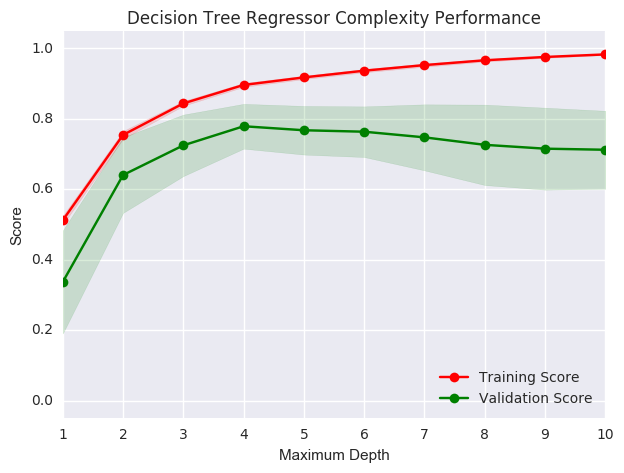

In [17]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: ** When the maximum depth is 1, it suffers from high bias. Since the model is too simple and it can not capture the struture of the data. From the picture above, the score is low. 

When the depth is 10, the model's complexity is increased, the gap between the training and validation scores is big, so the model suffers from high variance.


Note: "As a max_depth of 1 suffers from high bias, visually this is due to the low training and validation scores(also note that it has low variance since the scores are close together). As this model is not complex enough to learn the structure of the data
And a max_depth of 10 suffers from high variance, since we see a large gap between the training and validation scores, as we are basically just memorizing our training data and will not generalize well to new unseen data".

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: ** The optimal maximum depth is  4. After 4, the gap bewteen the training and testing scores begins to increase and the score of the testing decreases. At 4, the testing score is maximized. 

Note: "As we are definitely looking for the highest validation score(which is what gridSearch searches for). And we are also looking for a good bias / variance tradeoff(with close training and validation scores)."

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: ** It is a way of systematically working through multiple combinations of hyper-parameter tunes, cross-validating as it goes to determine which tune gives the best performance (measured by some metrics of the model, for example, the accuarcy, R^2, F-score and so on.).  

Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

The grid search technique exhaustively tries every combination of the provided hyper-parameter values in order to find the best model.

When the dataset is too large, the exhaustive search is computational expensive. RandomizedSearchCV comes to rescue.  Instead of exploring the whole parameter space just a fixed number of parameter settings is sampled from the specified distributions. It can save some time and computation. 


one limitation of GridSearch is that it can be very computationally expensive when dealing with a large number of different hyperparameters and much bigger datasets. Therefore there are two other techniques that we could explore to validate our hyperparameters

RandomizedSearchCV which can sample a given number of candidates from a parameter space with a specified distribution. Which performs surprisingly well!
Or a train / validation / test split, and we can validate our model on the validation set. Often used with much bigger datasets

Links
(https://www.youtube.com/watch?v=hihuMBCuSlU)
(http://scikit-learn.org/stable/modules/grid_search.html)
(https://en.wikipedia.org/wiki/Hyperparameter_optimization#Grid_search)

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: ** K-fold cross-validation: divide the dataset into k subsets. Each time, one of the k subsets is used as the test set and the other k-1 subsets are put together to form a training set. Then the average error across all k trials is computed. Every data point gets to be in a test set exactly once, and gets to be in a training set k-1 times. The variance of the resulting estimate is reduced as k is increased. 

When use grid search, without a cross-validation set, it is hard to tell whether the model with some parameters performs well or not. 

Note: "This is an extremely important concept in machine learning, as this allows for multiple testing datasets and is not just reliant on the particular subset of partitioned data. For example, if we use single validation set and perform grid search then it is the chance that we just select the best parameters for that specific validation set. But using k-fold we perform grid search on various validation set so we select best parameter for generalize case. Thus cross-validation better estimates the volatility by giving you the average error rate and will better represent generalization error."

In [74]:
# # An example:
# import numpy as np
# from sklearn import cross_validation
# from sklearn import datasets
# from sklearn import svm

# iris = datasets.load_iris()

# # Split the iris data into train/test data sets with 30% reserved for testing
# X_train, X_test, y_train, y_test = cross_validation.train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

# # Build an SVC model for predicting iris classifications using training data
# clf = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train, y_train)

# # Now measure its performance with the test data with single subset
# print clf.score(X_test, y_test) 

# # We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
# scores = cross_validation.cross_val_score(clf, iris.data, iris.target, cv=5)

# # Print the accuracy for each fold:
# print scores

# # And the mean accuracy of all 5 folds:
# print scores.mean()
    

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [18]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from  sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0],  test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=10)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, param_grid=params, scoring=scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [19]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: ** The maximum depth of the optimal model is 4, the same as  my former guess in question 6.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [20]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $416,500.00
Predicted selling price for Client 2's home: $234,994.12
Predicted selling price for Client 3's home: $893,760.00


**Answer: ** 


1) By the model, the predicted selling price for Client 1's home: $\$$ 416,500.00. It is below the median or the mean price. It is due to the high value of "LSTAT", which is above 75% of all data points. 


2) The predicted selling price for Client 2's home: $\$$ 234,994.12, which is below the 25% percentile. That is because its average room number is 4, below 25% among all data points; the value of "LSTAT" is very high, close to the maximum value of all "LSTAT"s. Student-teacher ratio of nearby schools is the highest. From all the three aspects, it is not a surprise that the price is low. 

3) Predicted selling price for Client 3's home: $\$$ 893,760.00, and  it is  above 75% percentile. Its average room number is close to the max value of "RM", Neighborhood poverty level is very low: 3%, below the 25% percentile of all data points. The Student-teacher ratio of nearby schools is 12 to 1, a little less than the min value of all data points. So from the three aspects, it has advantages and the predicted price is resonable. 



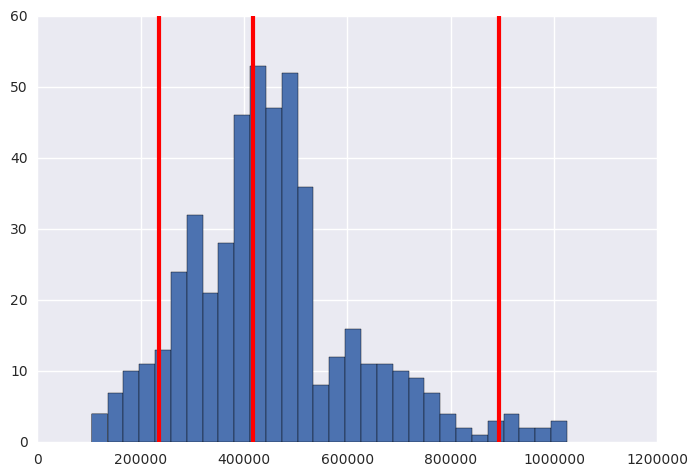

In [23]:
import matplotlib.pyplot as plt
plt.hist(prices, bins = 30)
for price in reg.predict(client_data):
    plt.axvline(price, c = 'r', lw = 3)

In [21]:
prices.describe()

count    4.890000e+02
mean     4.543429e+05
std      1.653403e+05
min      1.050000e+05
25%      3.507000e+05
50%      4.389000e+05
75%      5.187000e+05
max      1.024800e+06
Name: MEDV, dtype: float64

In [22]:
features.describe()

,RM,LSTAT,PTRATIO
count,489.000000,489.000000,489.000000
mean,6.240288,12.939632,18.516564
std,0.643650,7.081990,2.111268
min,3.561000,1.980000,12.600000
25%,5.880000,7.370000,17.400000
50%,6.185000,11.690000,19.100000
75%,6.575000,17.120000,20.200000
max,8.398000,37.970000,22.000000


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [20]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **
There are some reasons that the model constructed should not be used in a real-world setting. 
1. The house market today is different from that in 1978, when the data was collected. 
2. We only used three features when training the data. However, the prices of houses are related to many factors, so more features would be helpful.
3. From the result of vs.PredictTrials, the range in prices is as high as 69,044.61 dollars. The model is not robust.
4. Also, prices of houses are different in urban city like Boston and rural cities. One can not use the model training by this dataset to predict the prices of houses in rural cities.


In [26]:
# from IPython.display import Image
# from sklearn.externals.six import StringIO
# import pydot
# from sklearn import tree

# clf = DecisionTreeRegressor(max_depth=4)
# clf = clf.fit(X_train, y_train)
# dot_data = StringIO()
# tree.export_graphviz(clf, out_file=dot_data,
#     feature_names=X_train.columns,
#     class_names="PRICES",
#     filled=True, rounded=True,
#     special_characters=True)
# graph = pydot.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())

<img src="http://localhost:8889/files/Documents/udacity_machine_learning/machine-learning-master/projects/boston_housing/tree.png">

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.